# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style='whitegrid')

import warnings

warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [5]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

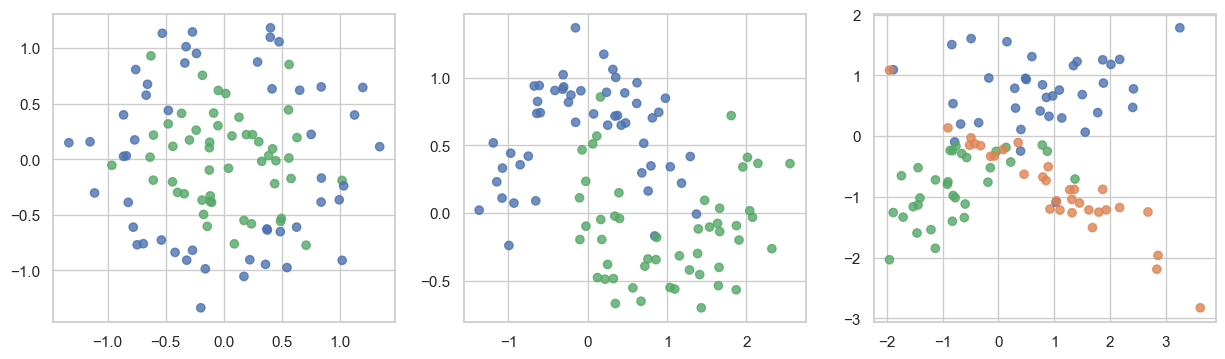

In [6]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

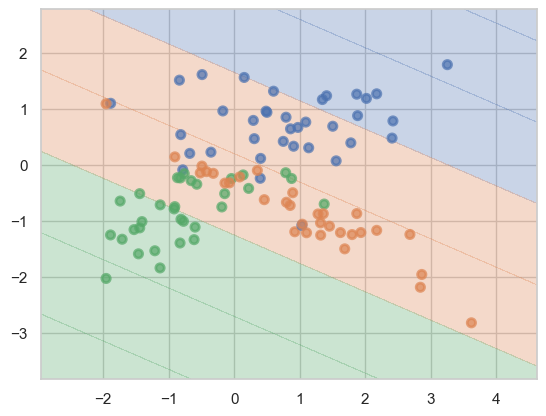

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

теперь деревья:

##1

Accuracy: 1.0


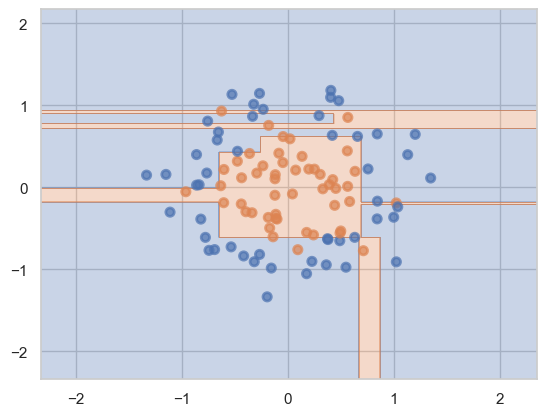

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr = DecisionTreeClassifier().fit(X, y)
plot_surface(lr, X, y)
print("Accuracy:", accuracy_score(y_test, lr.predict(X_test)))

переобучилось колосально accuracy 1

Accuracy: 1.0


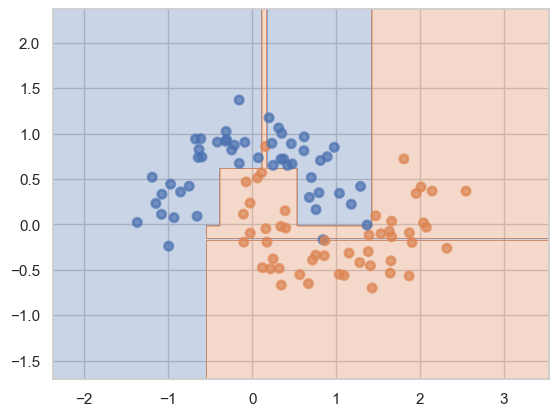

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr = DecisionTreeClassifier().fit(X, y)
plot_surface(lr, X, y)
print("Accuracy:", accuracy_score(y_test, lr.predict(X_test)))

Accuracy: 1.0


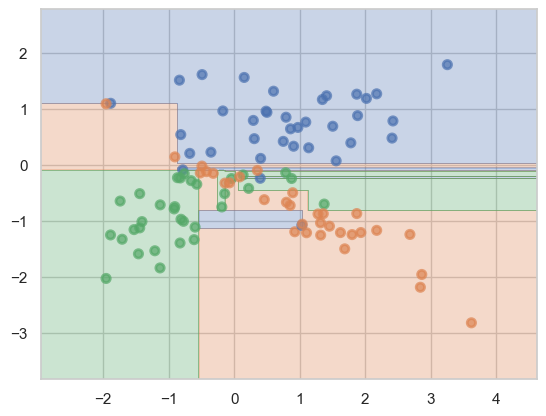

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr = DecisionTreeClassifier().fit(X, y)
plot_surface(lr, X, y)
print("Accuracy:", accuracy_score(y_test, lr.predict(X_test)))


__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

5 5


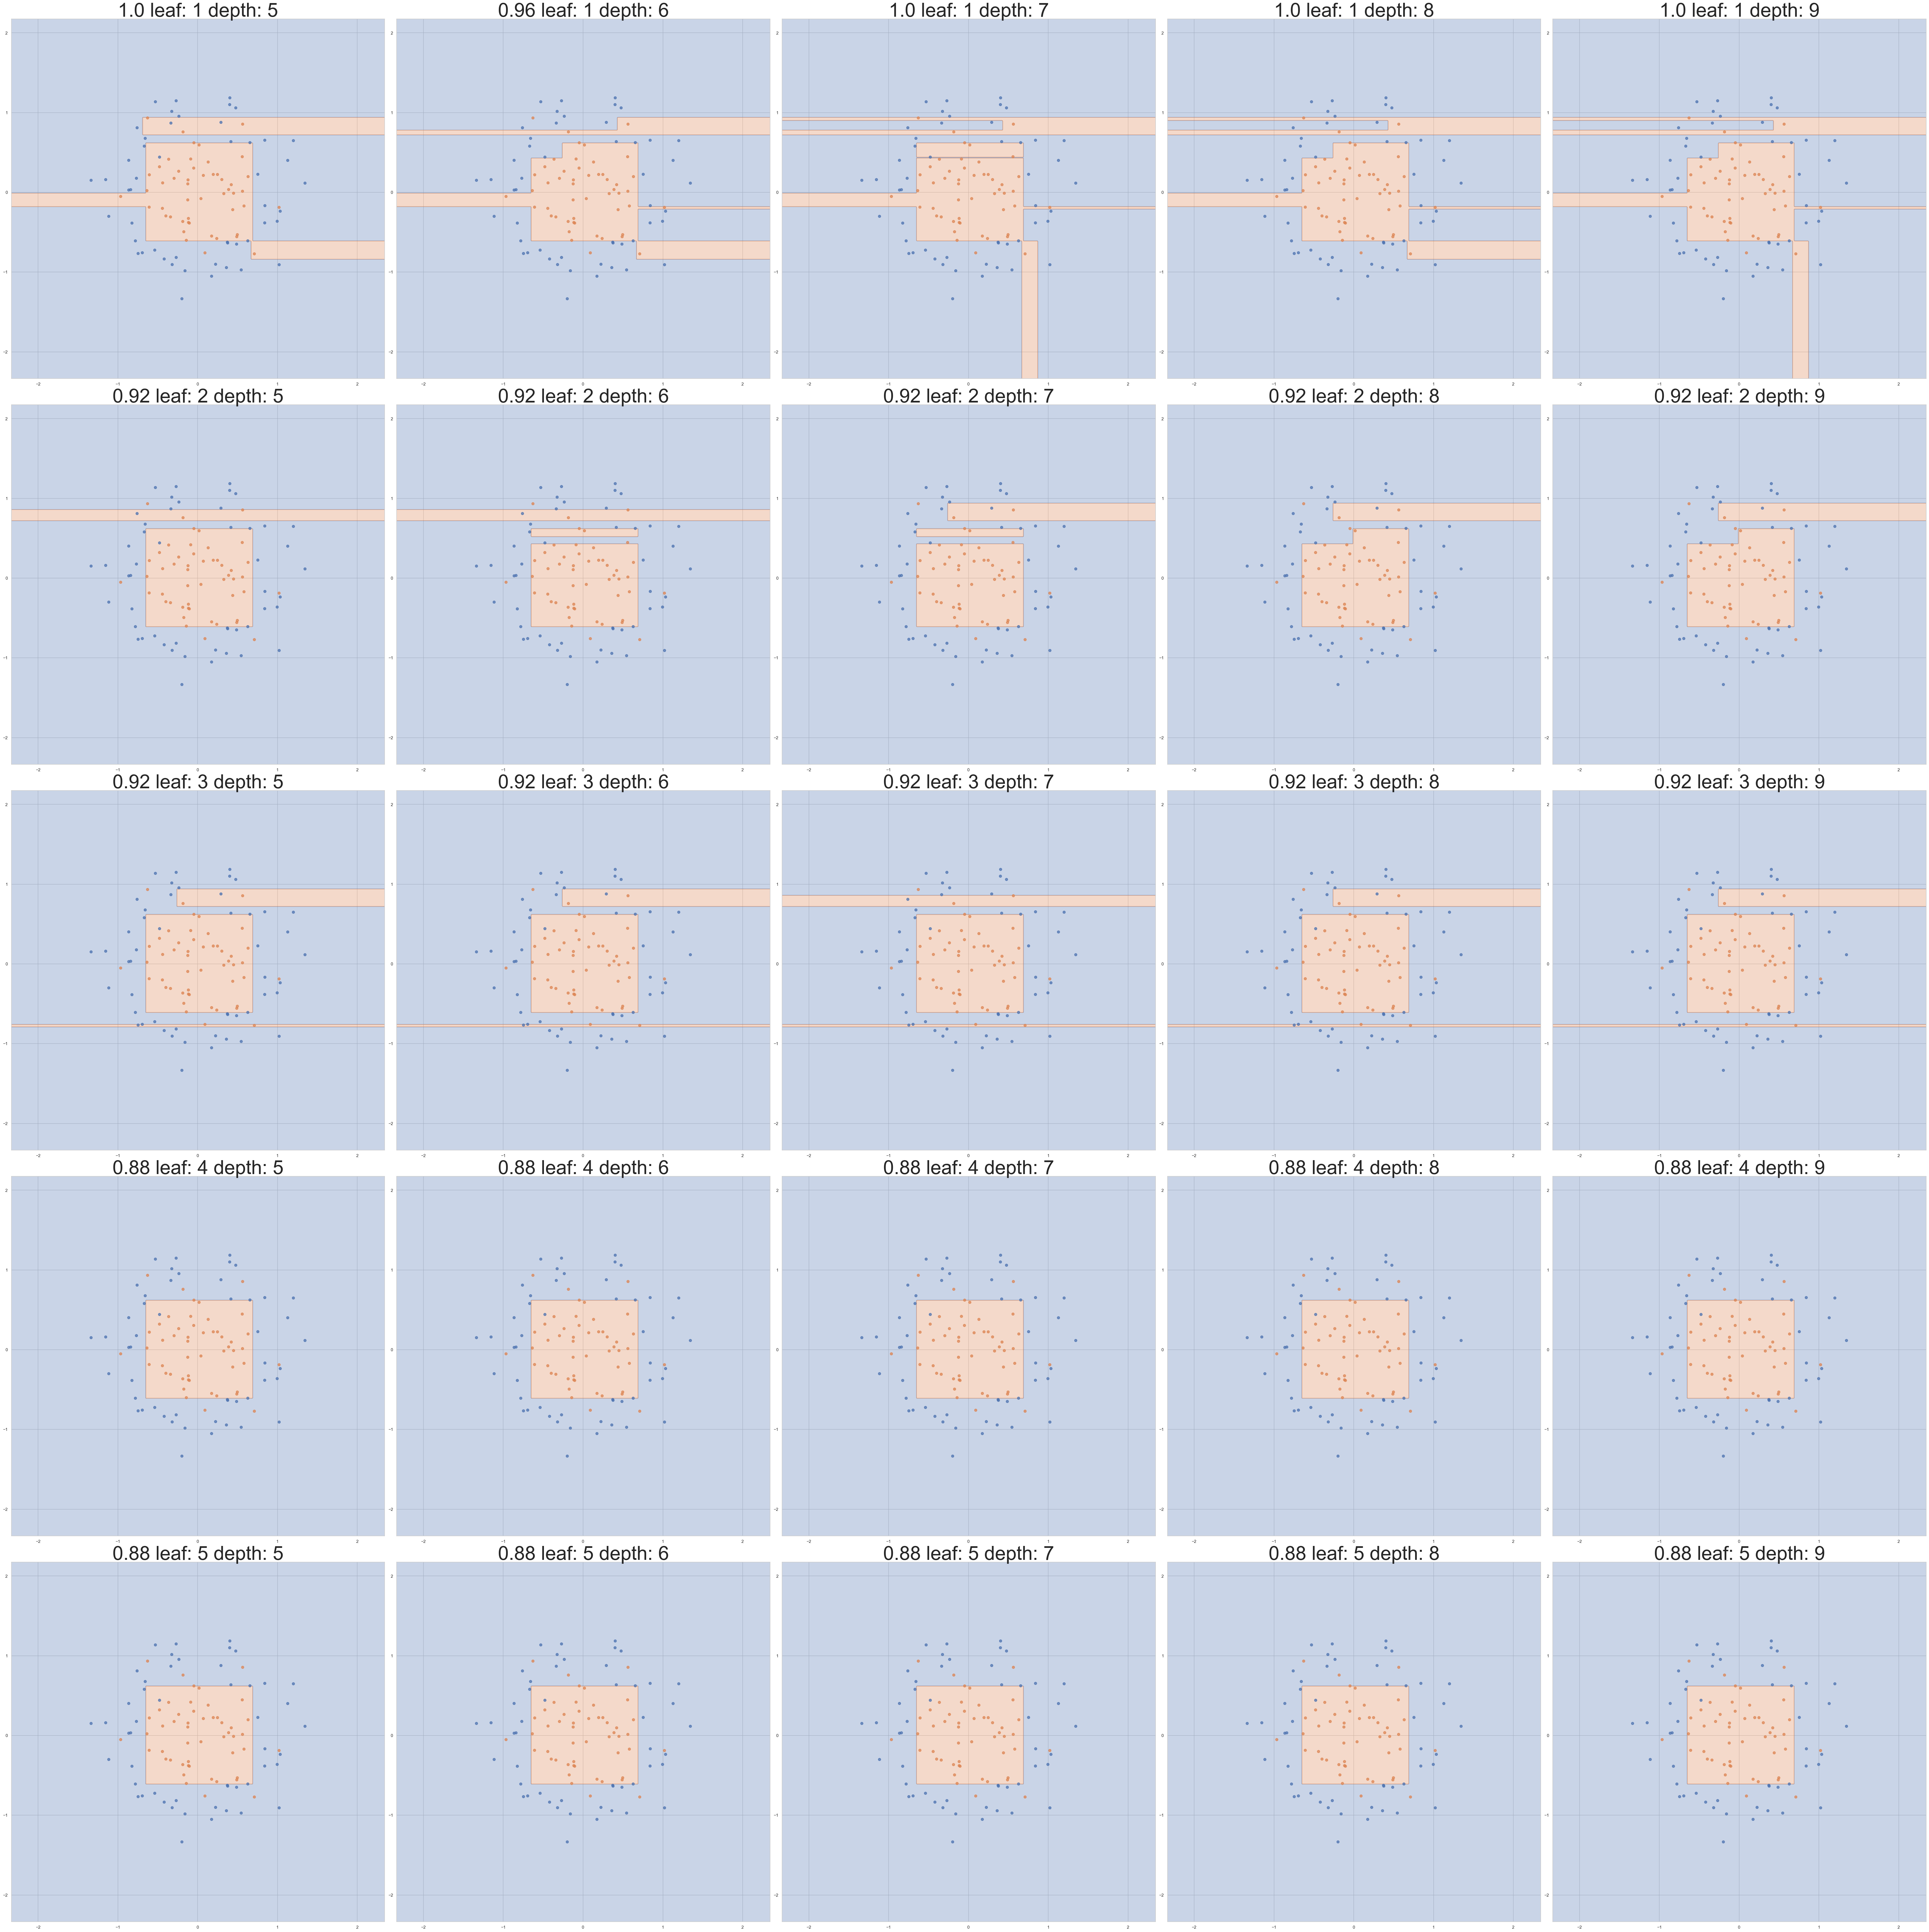

In [36]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

min_sample_leaf_vars = np.arange(1, 6, 1)
max_depth_vars = np.arange(5, 10, 1)
plt.figure(figsize=(70, 70))
print(len(min_sample_leaf_vars), len(max_depth_vars))
for i, min_samples_leaf in enumerate(min_sample_leaf_vars):
    for j, max_depth in enumerate(max_depth_vars):
        plt.subplot(5, 5, i * 5 + j + 1)
        lr = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=max_depth).fit(X, y)
        plot_surface(lr, X, y)
        plt.title(
            str(accuracy_score(y_test, lr.predict(X_test))) + " leaf: " + str(min_samples_leaf) + " depth: " + str(
                max_depth), fontsize=50)
        # plt.xlabel('Feature 1', fontsize=30) # Размер подписи оси x
        # plt.ylabel('Feature 2', fontsize=30)
plt.show()

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Под критерием Джини здесь подразумевается следующая функция:
$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
$R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
$H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

In [54]:
def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    sort_idx = np.argsort(feature_vector)
    feature_vector = feature_vector[sort_idx]
    target_vector = target_vector[sort_idx]
    thresholds = (feature_vector[:-1] + feature_vector[1:]) / 2.0

    size_ = len(feature_vector)

    l_size = np.arange(1, size_)
    r_size = size_ - l_size

    l1 = np.cumsum(target_vector)[:-1]
    r1 = (np.sum(target_vector) - l1)
    h_l = 1 - (l1 / l_size) ** 2 - ((l_size - l1) / l_size) ** 2
    h_r = 1 - (r1 / r_size) ** 2 - ((r_size - r1) / r_size) ** 2
    ginis = - l_size / size_ * h_l - r_size / size_ * h_r

    gini_best = max(ginis)
    threshold_best = thresholds[np.argmax(ginis)]
    return thresholds, ginis, threshold_best, gini_best

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [56]:
df = pd.read_csv(
    r"https://raw.githubusercontent.com/esokolov/ml-course-hse/refs/heads/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv")

In [59]:
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS'], dtype='object')

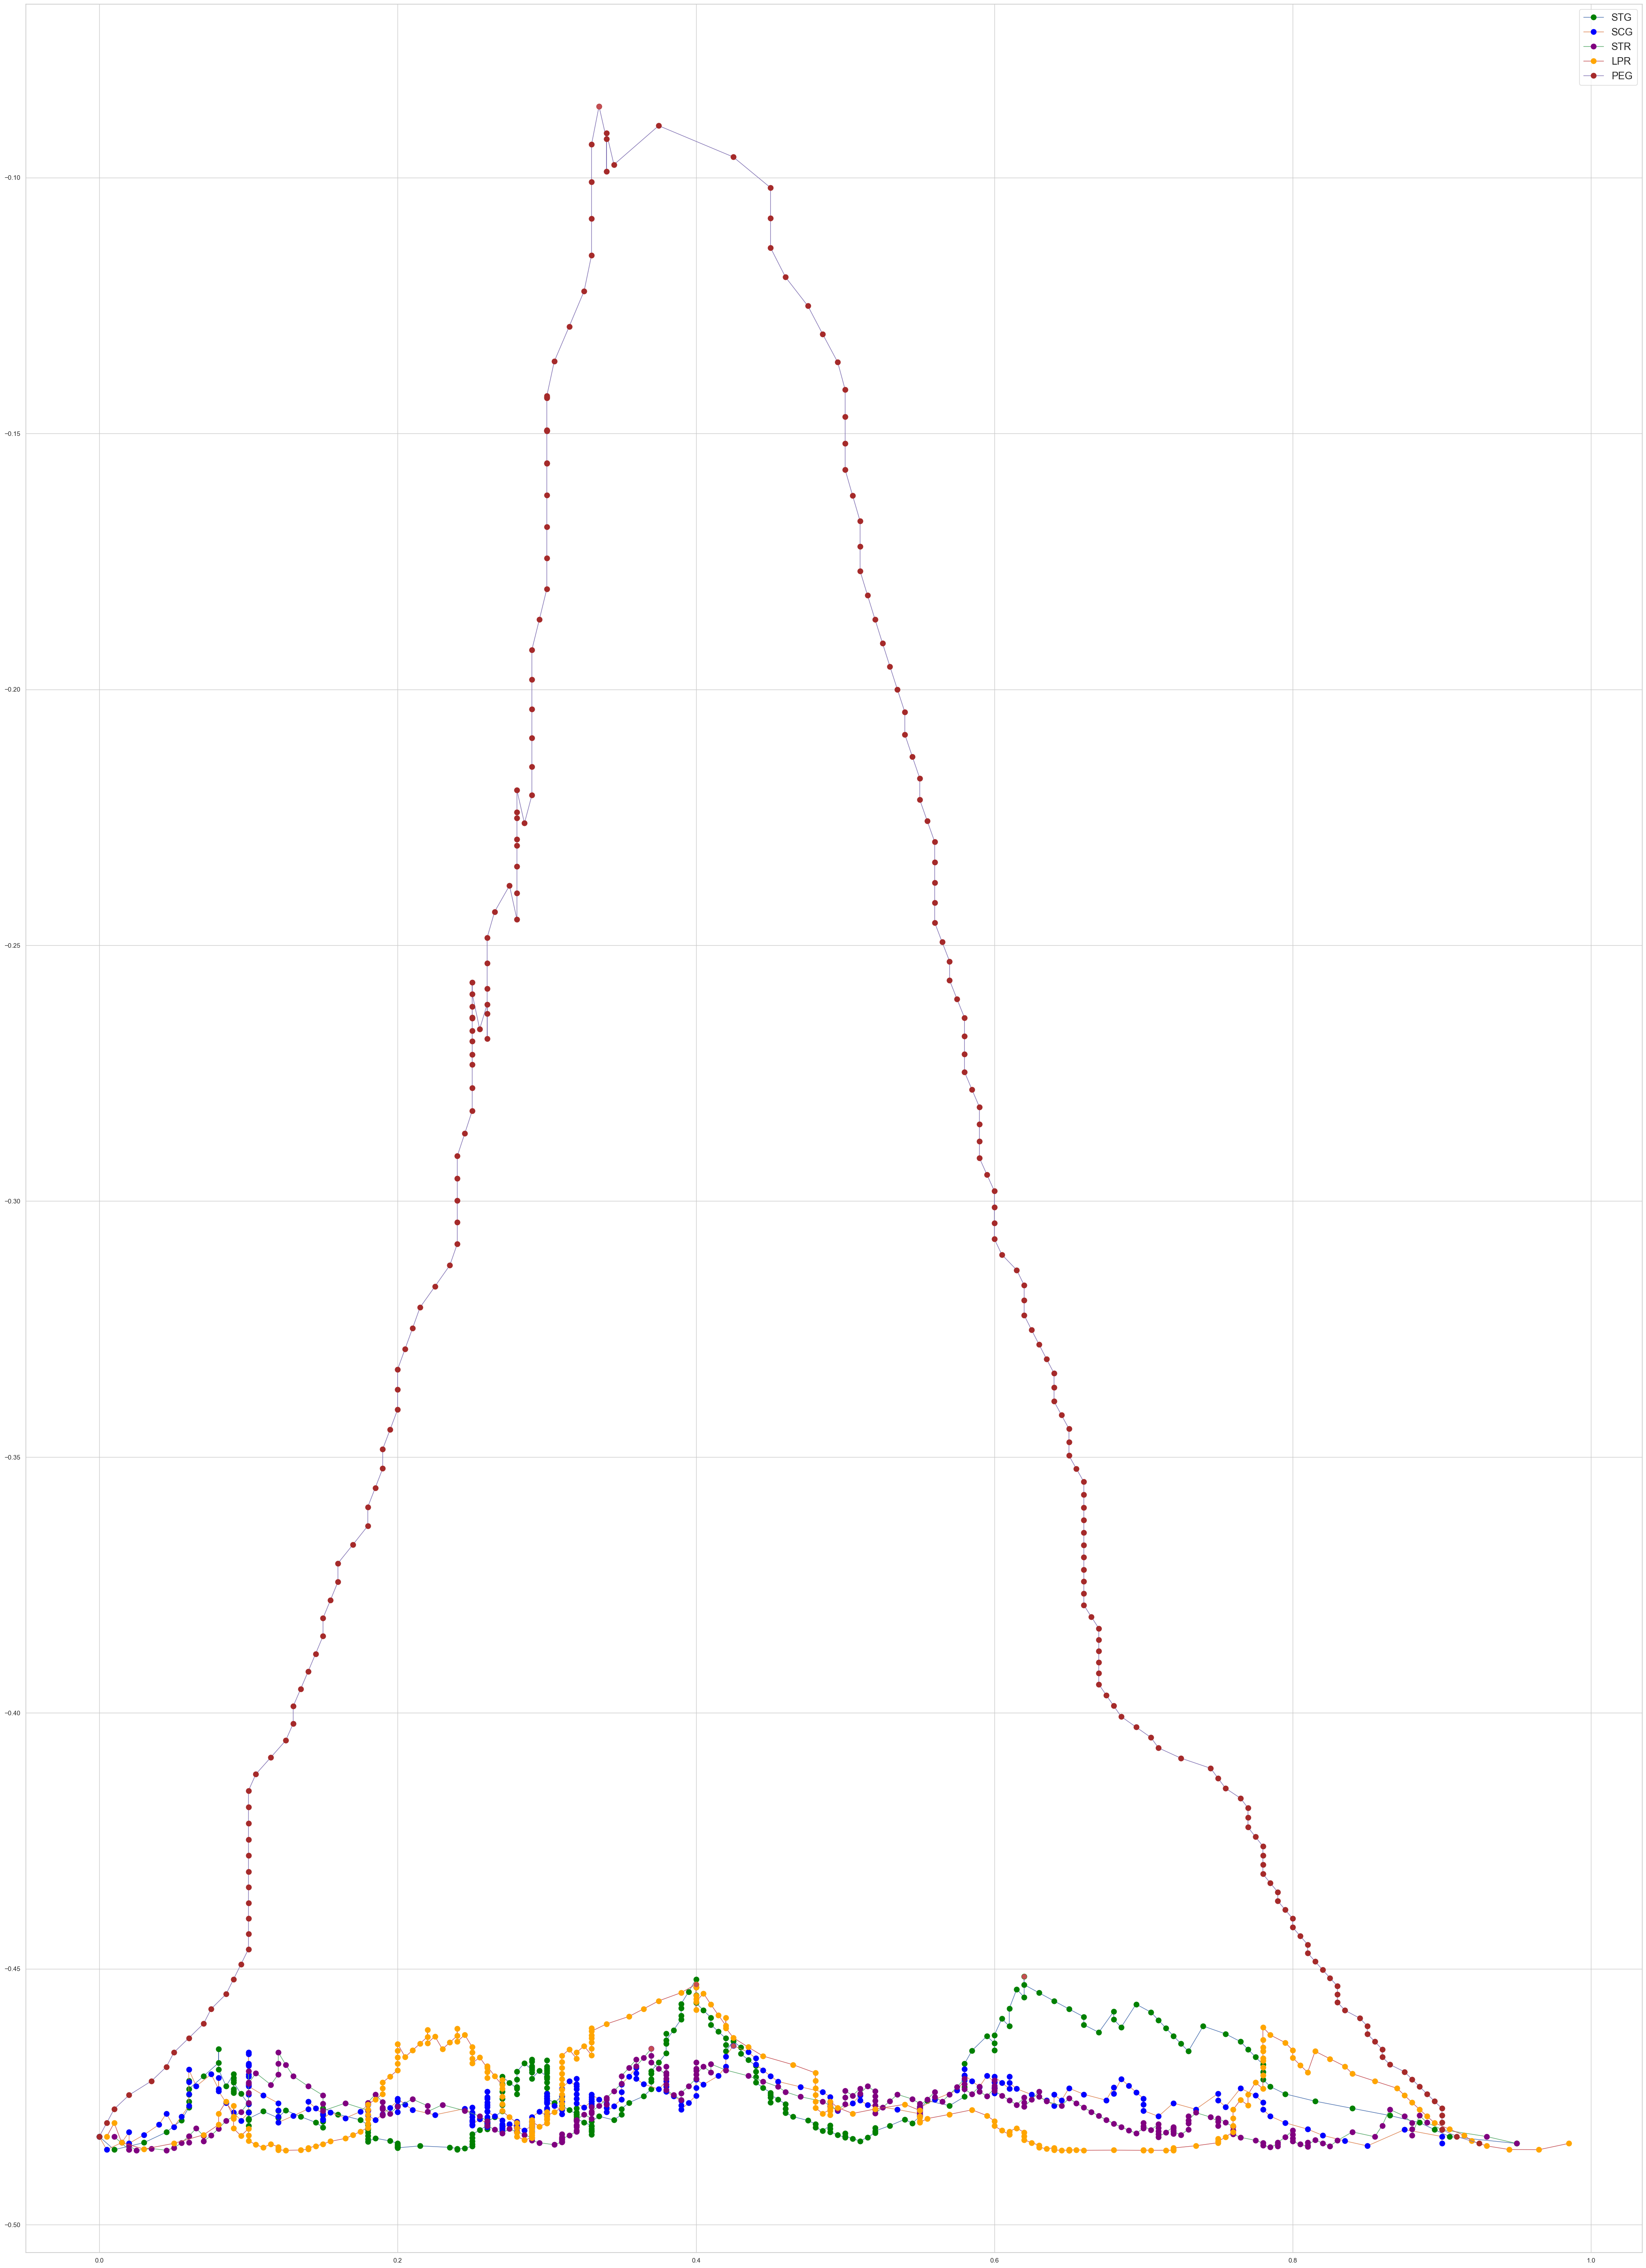

In [78]:
plt.figure(figsize=(50, 70))
colors_list = ['green', 'blue', 'purple', 'orange', 'brown', 'pink']
for i, col in enumerate(df.columns[:-1]):
    thresholds, ginis, threshold_best, gini_best = find_best_split(np.array(df[col]), np.array(df['UNS']))
    plt.plot(thresholds, ginis, marker='o', linestyle='-', linewidth=1, markersize=8, markerfacecolor=colors_list[i],
             markeredgecolor=colors_list[i], markeredgewidth=2, label=col)
    plt.plot(threshold_best, gini_best, 'ro', markersize=8)
plt.legend(fontsize='x-large')
plt.show()

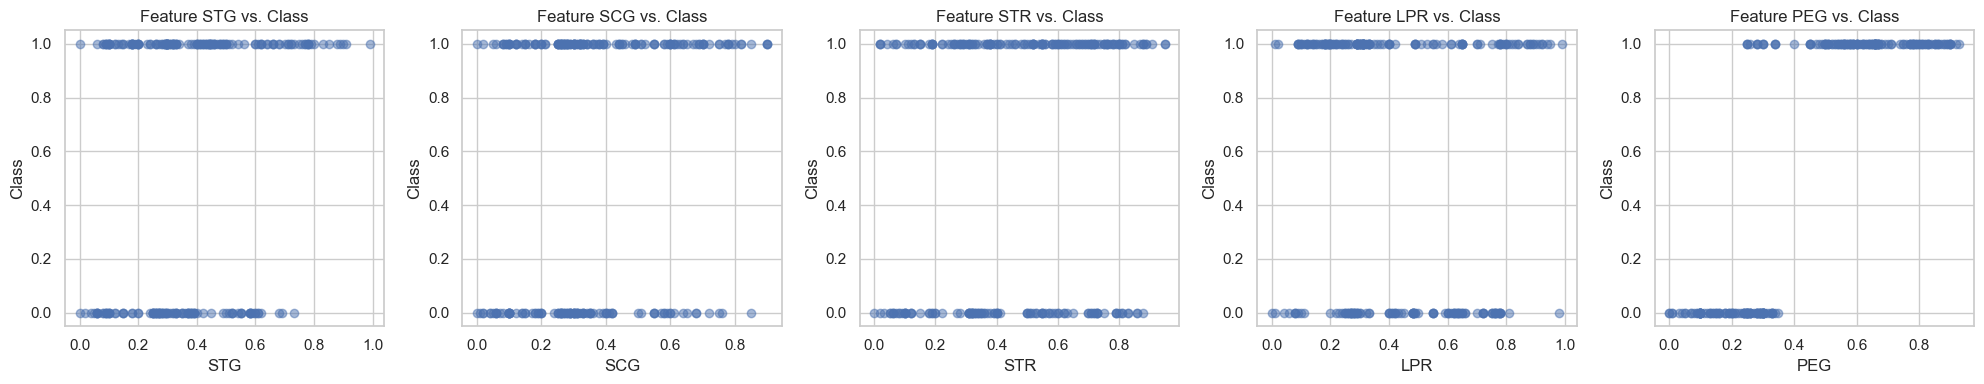

In [83]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns of subplots

for i, col in enumerate(df.columns[:-1]):
    axes[i].scatter(df[col], df['UNS'], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Class")
    axes[i].set_title(f"Feature {col} vs. Class")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

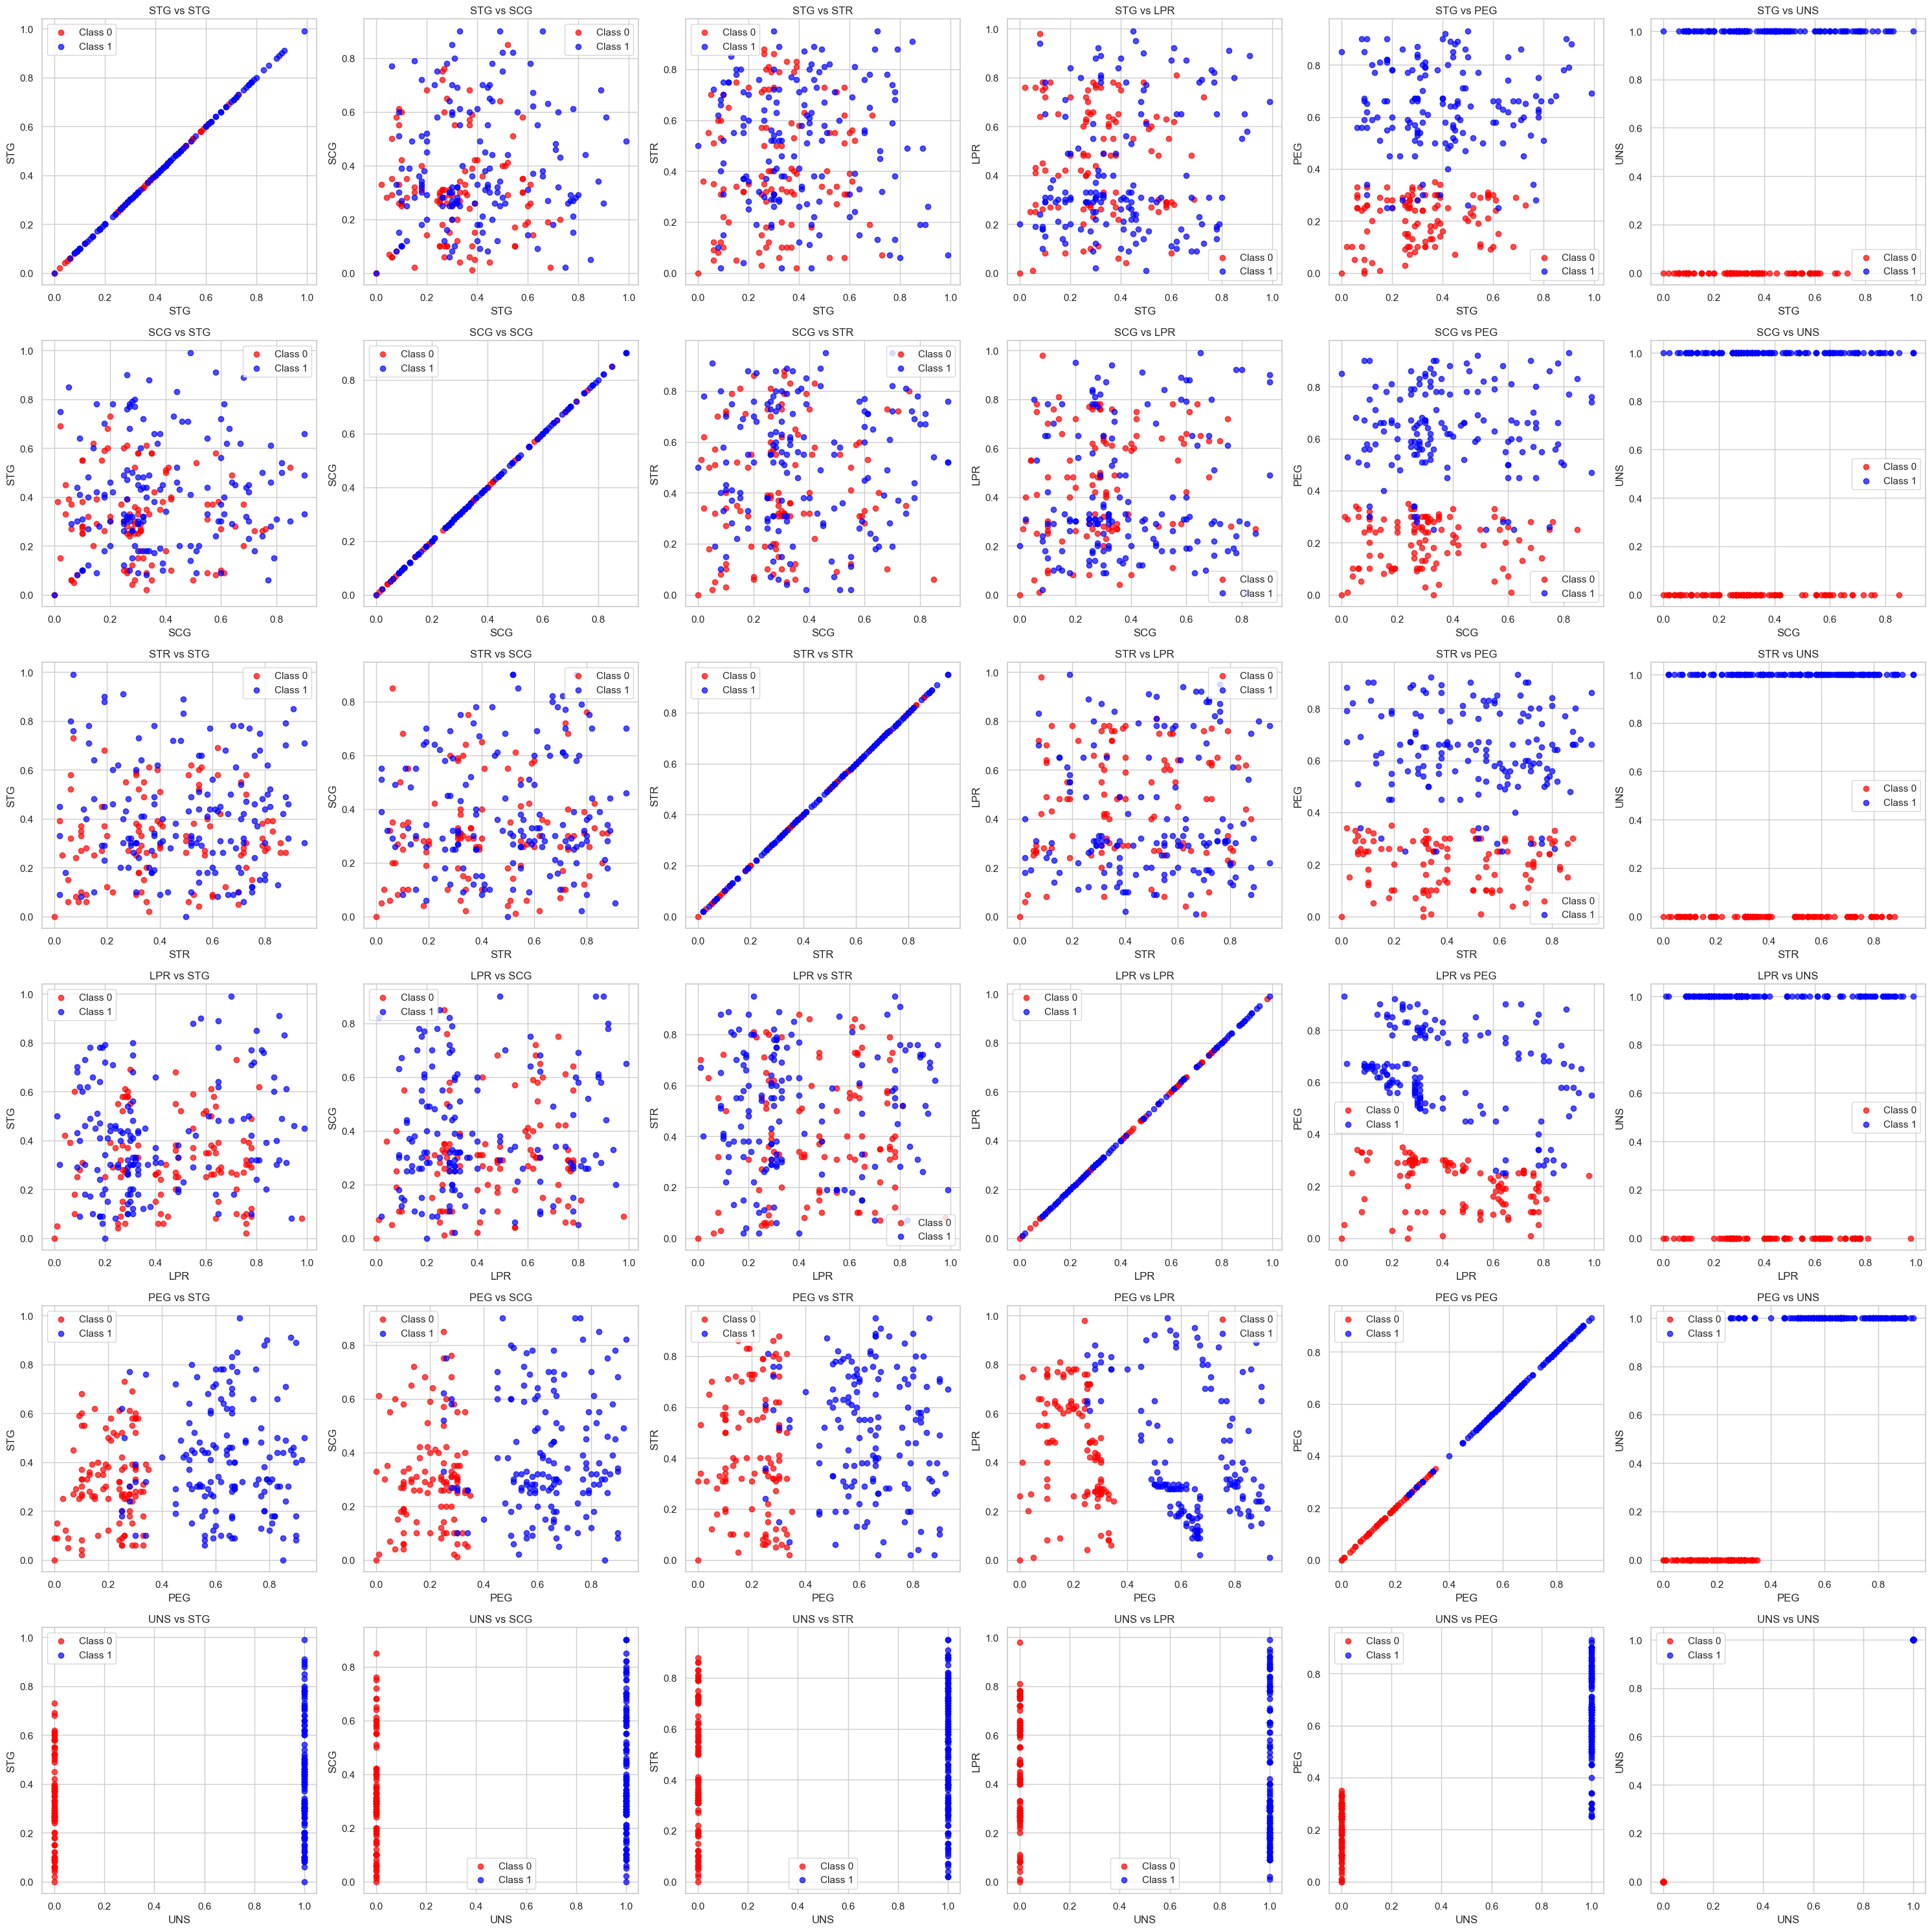

In [100]:
n = 6

fig, axes = plt.subplots(n, n, figsize=(5 * n, 5 * n))

colors = {0: 'red', 1: 'blue'}

for i, feature1 in enumerate(df.columns):
    for j, feature2 in enumerate(df.columns):
        ax = axes[i][j]
        for uns in [0, 1]:
            subset = df[df['UNS'] == uns]
            e = subset[feature1]
            e = subset[feature2]
            e = colors[uns]
            ax.scatter(subset[feature1], subset[feature2], c=colors[uns], label=f'Class {uns}', alpha=0.7)

        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)
        ax.set_title(f'{feature1} vs {feature2}')
        ax.grid(True)
        ax.legend()
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** по PEG график на домик похож

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [212]:
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin


class DecisionTree(BaseEstimator, ClassifierMixin):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):  # ==
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count  # / current_click
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))  # x[0/1] ?
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if len(feature_vector) <= 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, np.array(sub_y))
            split_ = feature_vector < threshold
            if np.sum(split_) == 0 or np.sum(split_) == len(split_):
                continue
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))

        if feature_best is None:  # or gini_best == -1
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best

        node["left_child"], node["right_child"] = {}, {}
        if len(sub_y[split]) == 0 or len(sub_y[np.logical_not(split)]) == 0:
            print(X.shape)
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        feature = node["feature_split"]
        if self._feature_types[feature] == "real":
            if x[feature] < node['threshold']:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            if x[feature] in node['categories_split']:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        X = np.array(X)
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)
    
    def get_params(self, deep=True):
        return {
            "feature_types": self._feature_types,
            "max_depth": self._max_depth,
            "min_samples_split": self._min_samples_split,
            "min_samples_leaf": self._min_samples_leaf
        }
    

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [214]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

df = pd.read_csv(url, names=column_names)
df['class'] = df['class'] == "p"
df['class'] = df['class'].astype(int)
X = df.drop(columns='class')
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [215]:
np.array(X_train).shape, y_train.shape

((4062, 22), (4062,))

In [216]:
tree = DecisionTree(22 * ["categorical"])
tree.fit(np.array(X_train), np.array(y_train))

In [217]:
print(accuracy_score(tree.predict(np.array(X_train)), np.array(y_train)))
print(accuracy_score(tree.predict(np.array(X_test)), np.array(y_test)))

1.0
1.0


{'type': 'nonterminal',
 'feature_split': 4,
 'categories_split': ['l', 'a', 'n'],
 'left_child': {'type': 'nonterminal',
                'feature_split': 19,
                'categories_split': ['n', 'k', 'y', 'b', 'h', 'o', 'u', 'w'],
                'left_child': {'type': 'nonterminal',
                               'feature_split': 14,
                               'categories_split': ['e', 'p', 'g', 'o', 'w', 'n'],
                               'left_child': {'type': 'nonterminal',
                                              'feature_split': 1,
                                              'categories_split': ['s', 'f', 'y'],
                                              'left_child': {'type': 'nonterminal',
                                                             'feature_split': 14,
                                                             'categories_split': ['e', 'p', 'g', 'o', 'w'],
                                                             'left_child': {'type': 'nonterminal',
                                                                            'feature_split': 21,
                                                                            'categories_split': ['w', 'd', 'g', 'm', 'u', 'p'],
                                                                            'left_child': {'type': 'terminal', 'class': 0},
                                                                            'right_child': {'type': 'nonterminal',
                                                                                            'feature_split': 1,
                                                                                            'categories_split': ['s'],
                                                                                            'left_child': {'type': 'terminal', 'class': 0},
                                                                                            'right_child': {'type': 'terminal', 'class': 1}}},
                                                             'right_child': {'type': 'nonterminal',
                                                                             'feature_split': 10,
                                                                             'categories_split': ['b'],
                                                                             'left_child': {'type': 'terminal', 'class': 0},
                                                                             'right_child': {'type': 'terminal', 'class': 1}}},
                                              'right_child': {'type': 'terminal', 'class': 1}},
                               'right_child': {'type': 'terminal', 'class': 1}},
                'right_child': {'type': 'terminal', 'class': 1}},
 'right_child': {'type': 'terminal', 'class': 1}}

глубина дерева 7, accuracy 1

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [218]:
from sklearn.model_selection import StratifiedKFold


def get_cross_val_score(X, y, model):
    counter = 0
    sum_ = 0
    cv = StratifiedKFold(n_splits=10, shuffle=True)
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # print(X_train.shape, y_train.shape)
        model.fit(np.array(X_train), np.array(y_train))
        sum_ += accuracy_score(model.predict(np.array(X_test)), np.array(y_test))
        counter += 1
    return sum_ / counter

In [223]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

sklearn_tree = DecisionTreeClassifier()
sklearn_score = cross_val_score(sklearn_tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
print("Sklearn score", sklearn_score)

tree_cat = DecisionTree(len(X.columns) * ["categorical"])
cat_score = cross_val_score(tree_cat, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
print("Все категориальные", cat_score)

tree_vesh = DecisionTree(len(X.columns) * ["real"])
vesh_score = cross_val_score(tree_vesh, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
print("Все вещественные", vesh_score)

ohe = OneHotEncoder()
ohe.fit_transform(X)
tree_ohe = DecisionTree(len(X.columns) * ["real"])
ohe_score = cross_val_score(tree_ohe, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
print("OHE вещественные", ohe_score)

Sklearn score 0.9655560200922206
Все категориальные 1.0
Все вещественные 0.9992610837438424
OHE вещественные 0.9992610837438424


In [224]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score


def process_one_data(name, X, y):
    for col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    
    sklearn_tree = DecisionTreeClassifier()
    sklearn_score = cross_val_score(sklearn_tree, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    print("Sklearn score", sklearn_score)
    
    tree_cat = DecisionTree(len(X.columns) * ["categorical"])
    cat_score = cross_val_score(tree_cat, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    print("Все категориальные", cat_score)
    
    tree_vesh = DecisionTree(len(X.columns) * ["real"])
    vesh_score = cross_val_score(tree_vesh, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    print("Все вещественные", vesh_score)
    
    ohe = OneHotEncoder()
    ohe.fit_transform(X)
    tree_ohe = DecisionTree(len(X.columns) * ["real"])
    ohe_score = cross_val_score(tree_ohe, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    print("OHE вещественные", ohe_score)

    result = {'vesh_score': vesh_score, 'cat_score': cat_score, 'ohe_score': ohe_score, 'sklearn_score': sklearn_score}

    return pd.Series(result, name=name)

In [244]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Load Datasets
mushrooms_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mushrooms_column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
mushrooms_df = pd.read_csv(mushrooms_url, names=mushrooms_column_names)

# Handle the Target and Features Like in Your Example for Mushrooms
mushrooms_df['class'] = mushrooms_df['class'] == "p"  # True for poisonous, False for edible
mushrooms_df['class'] = mushrooms_df['class'].astype(int)  # Convert boolean to int (0 or 1)
X_mushrooms = mushrooms_df.drop(columns='class')
y_mushrooms = mushrooms_df['class']

tic_tac_toe_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
tic_tac_toe_column_names = [
    "top-left-square", "top-middle-square", "top-right-square",
    "middle-left-square", "middle-middle-square", "middle-right-square",
    "bottom-left-square", "bottom-middle-square", "bottom-right-square",
    "class"
]
tic_tac_toe_df = pd.read_csv(tic_tac_toe_url, names=tic_tac_toe_column_names)

# Map 'positive' to 1, 'negative' to 0 in tic_tac_toe
tic_tac_toe_df['class'] = tic_tac_toe_df['class'].map({'positive': 1, 'negative': 0})

# Separate target variable and features
X_tic_tac_toe = tic_tac_toe_df.drop(columns='class')
y_tic_tac_toe = tic_tac_toe_df['class']

cars_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
cars_column_names = [
    "buying", "maint", "doors", "persons", "lug_boot", "safety", "class"
]
cars_df = pd.read_csv(cars_url, names=cars_column_names)
cars_class_mapping = {"unacc": 0, "acc": 0, "good": 1, "vgood": 1}
cars_df["class"] = cars_df["class"].map(cars_class_mapping)

# Separate target variable and features
X_cars = cars_df.drop(columns='class')
y_cars = cars_df['class']

nursery_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
nursery_column_names = [
    "parental_status", "form_of_children", "number_of_children",
    "housing", "finance", "social_support", "health", "nursery_occupation",
    "class"
]
nursery_df = pd.read_csv(nursery_url, names=nursery_column_names)
nursery_class_mapping = {"not_recom": 0, "recommend": 0, "very_recom": 1, "priority": 1, "spec_prior": 1}
nursery_df["class"] = nursery_df["class"].map(nursery_class_mapping)

# Separate target variable and features
X_nursery = nursery_df.drop(columns='class')
y_nursery = nursery_df['class']

# 2. Encode Categorical Features using LabelEncoder
datasets = {
    "mushrooms": [X_mushrooms, y_mushrooms],
    "tic_tac_toe": [X_tic_tac_toe, y_tic_tac_toe],
    "cars": [X_cars, y_cars],
    "nursery": [X_nursery, y_nursery],
}


In [247]:
future_df = []
for dataset_name, (X, y) in datasets.items():
    future_df.append(process_one_data(dataset_name, X, y))

stat = pd.DataFrame(future_df)
stat

Sklearn score 0.9611225225552747
Все категориальные 1.0
Все вещественные 0.9992610837438424
OHE вещественные 0.9992610837438424
Sklearn score 0.7466776315789474
Все категориальные 0.5688486842105263
Все вещественные 0.6586184210526316
OHE вещественные 0.6586184210526316
Sklearn score 0.9432853878209437
Все категориальные 0.9611809382981583
Все вещественные 0.9124680736658153
OHE вещественные 0.9124680736658153
Sklearn score 0.9996913580246914
Все категориальные 0.9998456790123458
Все вещественные 0.9998456790123458
OHE вещественные 0.9998456790123458


,vesh_score,cat_score,ohe_score,sklearn_score
mushrooms,0.999261,1.000000,0.999261,0.961123
tic_tac_toe,0.658618,0.568849,0.658618,0.746678
cars,0.912468,0.961181,0.912468,0.943285
nursery,0.999846,0.999846,0.999846,0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: